In [1]:
##########################################
# Support cours 3 : Régression linéaire  #
##########################################

In [253]:
# Required libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
%matplotlib inline

### I.  Exemple - Spread de crédit : Relation de linéarité

Data:   
https://bondevalue.mx/bond-market/Bnp-Paribas-Sa-FR0013431277  
https://bondevalue.mx/bond-market/Bnp-Paribas-Sa-XS1325645825  
https://bondevalue.mx/bond-market/Bnp-Paribas-Sa-XS1470601656  
https://bondevalue.mx/bond-market/Bnp-Paribas-Sa-XS1247508903

Estimation du spread de crédit de BNP courbe EUR pour différentes maturités 

 
2026 (t=5) : 89.3  bps  
2027 (t=6) : 96.3  bps   
2031 (t=10): 118.2 bps   
2049 (t=18): 243.9 bps

En supposant une relation linéaire entre le spread de crédit et la maturité du bond t, estimez à partir des donnés de 2026 et 2027 le spread de l'année 2031 :  
<b>. En posant les equations</b>  
<b>. De manière matricielle </b>

<b>En posant l'équation:</b>

S = a x t+b  
a x 5+b = 89.3
a x 6+b = 96.3  
a = 96.3-89.3 = 7
b = 89.3-5 x 7 = 96.3 - 6 x 7 = 54.3
  
Pour t=10 on devrait donc avoir : 10 x 7+54.3  = 124.3 

<b>De manière matricielle:</b>  
$S=AX$ -> $A=X^{-1}S$


In [254]:
t = np.array([5,6])
y = np.array([89.3,96.3])
x= t.reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)
print(x)
a = np.dot(np.linalg.inv(x),y.reshape(-1,1))
print(a)


[[5. 1.]
 [6. 1.]]
[[ 7. ]
 [54.3]]


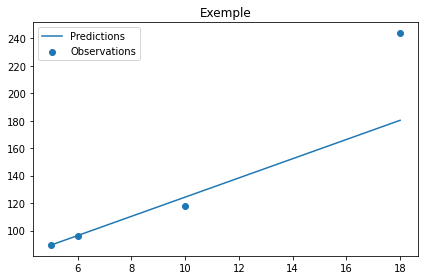

In [255]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2, 243.9], label='Observations')
plt.plot(t_list,[7*u+54.3 for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

Maintenant à partir de l'ensemble des données, estimez le spread de l'année 2050 de manière linéaire de telle sorte que la somme du carré des erreurs soit minimisées, de manière théorique et avec la fonction LinearRegression de scikit learn

Pour la partie théorique:  
On a: $\epsilon=Y-XA$  
Nous cherchons à minimiser: $\sum_{i}\epsilon_{i}^{2} = F(A) = ?$  
Pourquoi suffit il de trouver $A$ tel que $\frac{\delta F(A)}{\delta A}=0$ ?  
Cherchez la solution sous forme matricielle

<b>Solution theorique</b>  
  
$$\frac{\delta F(A)}{\delta a_{i,j}} = \frac{\delta(XA-Y)^{T}(XA-Y)}{\delta A}$$  
$$\frac{\delta(XA-Y)^{T}(XA-Y)}{\delta A} = 2*X^{T}(XA-Y) = 0$$  
    
Donc :   
$X^{T}XA=X^{T}Y$  
    
Si $X$ est de rang p, $X^{T}X$ est inversible (démonstration ?)  
Dans ce cas : $(X^{T}X)^{-1}(X^{T}X)A = A = (X^{T}X)^{-1}X^{T}Y$  

Qu'obtient on quand la matrice $X$ est inversible?


<b>Resolution theorique</b>

In [330]:
t = np.array([5,6,10,18])
y = np.array([89.3,96.3,118.2,243.9])
x= t.reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)

a = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y.reshape(-1,1)).reshape(-1)
print(a)

[11.99451074 19.97852029]


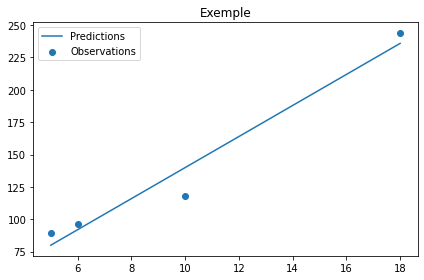

In [331]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2, 243.9], label='Observations')
plt.plot(t_list,[a[0]*u+a[1] for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

<b>Resolution avec scikit learn</b>

In [332]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [333]:
reg = LinearRegression().fit(t.reshape(-1,1),y)
print(reg.coef_)
print(reg.intercept_)

[11.99451074]
19.97852028639622


### II. Exemple théorique

<b>Generer un example théorique avec les valeurs suivantes:</b>

In [334]:
var= 0.01
nb_obs = 10000
nb_feature=5

X : matrice input avec "nb_obs" lignes et "nb_features" colonnes  
A : vecteur de "nb_features" coefficients  
eps :  "nb_obs" erreurs de variance "var"  
Y=XA+eps  
Estimez A  

In [335]:
x1 = np.random.uniform(low=0, high=1, size=(nb_obs,nb_feature))
a1= np.random.uniform(low=0,high=1, size=nb_feature)
y1 = np.dot(x1,a1)+np.random.normal(scale=np.sqrt(var), size=nb_obs)

In [336]:
est_a1 = np.dot(np.dot(np.linalg.inv(np.dot(x1.T,x1)),x1.T),y1.reshape(-1,1)).reshape(-1)

In [337]:
est_a1

array([0.66528656, 0.33943169, 0.82947617, 0.55769597, 0.07419223])

In [338]:
a1

array([0.66687865, 0.3377081 , 0.83660601, 0.55333977, 0.0737005 ])

Testez la normalité des résidus

In [339]:
help(shapiro)

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.

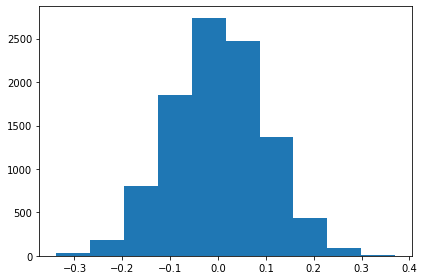

In [340]:
e1 = np.dot(x1,est_a1)
error1 = y1-e1
plt.hist(error1)
plt.tight_layout()

In [341]:
stat, p = shapiro(error1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1.000, p=0.535
Sample looks Gaussian (fail to reject H0)


c:\users\kevin vu\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Peut on calculer la covariance des coefficients dans ce cas précis ?

$Y= XA + \epsilon$    
$\epsilon \sim N(0,\sigma)$ 
$Var(A_{est}) = ?$

$Var(Y)=  \sigma*I_{n} $  
$Var(A_{est}) = Var((X^{T}X)^{-1}X^{T}Y)$  
On rappelle que : $Var(MV) = MVar(V)M^{T}$ avec $M$ matrice deterministe et $V$ vecteur aléatoire  
$Var(A_{est}) = (X^{T}X)^{-1}X^{T}\sigma*I_{n}(X(X^{T}X)^{-1})^{T} = (X^{T}X)^{-1}X^{T}\sigma*I_{n}X(X^{T}X)^{-1} = \sigma(X^{T}X)^{-1}X^{T}X(X^{T}X)^{-1} = \sigma(X^{T}X)^{-1}$ 

In [342]:
var_est = var*np.linalg.inv(np.dot(x1.T,x1))

In [343]:
var_est

array([[ 9.88645263e-06, -2.30792630e-06, -2.37042322e-06,
        -2.09662298e-06, -2.34515213e-06],
       [-2.30792630e-06,  9.67817499e-06, -2.26758355e-06,
        -2.22774702e-06, -2.03130852e-06],
       [-2.37042322e-06, -2.26758355e-06,  9.92572170e-06,
        -2.23949063e-06, -2.35169297e-06],
       [-2.09662298e-06, -2.22774702e-06, -2.23949063e-06,
         9.56955667e-06, -2.32308358e-06],
       [-2.34515213e-06, -2.03130852e-06, -2.35169297e-06,
        -2.32308358e-06,  9.78721815e-06]])

KPI : le $R^{2}$  
Le $R^{2}$  est défini de la manière suivante:  
$Var_{generale} = \sum (y_{i}-mean(Y))^{2}$  
$Var_{specifique} = \sum (y_{i}-\sum x_{i,j}*a_{j}))^{2}$  
$R^{2} = 1-\frac{Var_{specifique}}{Var_{generale}}$  
  
<b>Calculez le R2 dans ce cas théorique</b>


In [344]:
var_general = np.sum(np.power(y1-np.mean(y1),2))
var_specifique = np.sum(np.power(error1,2))
print(1-var_specifique/var_general)

0.9303458832462278


<b>Comment interpreter le R2 ?</b>
<b>Est ce un indicateur fiable ?</b>

<b>Retour au cas pratique : calcul du R2 pour la regression des spreads de crédits </b>

In [345]:
var_general = np.sum(np.power(y-np.mean(y),2))
var_specifique = np.sum(np.power(y-np.array([a[0]*u+a[1] for u in t_list]),2))
print(1-var_specifique/var_general)

0.9591031492191693


<b>Proposez d'autres indicateurs </b>:

Erreur absolu moyenne:

In [346]:
np.mean(np.abs(y-np.array([a[0]*u+a[1] for u in t_list])))

10.861813842482064

### III. Modification de l'espace de départ / espace d'arrivé

Supposons maintenant que la relation est linéaire entre le log du spread et la maturité, estimez le spread de l'année 2031
à partir de 2026 et 2027

In [347]:
#log(s) = a x t + b 
t = np.array([5,6])
y = np.array([89.3,96.3])
x= t.reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)
a = np.dot(np.linalg.inv(x),np.log(y).reshape(-1,1))
print(a)


[[0.07546683]
 [4.11466733]]


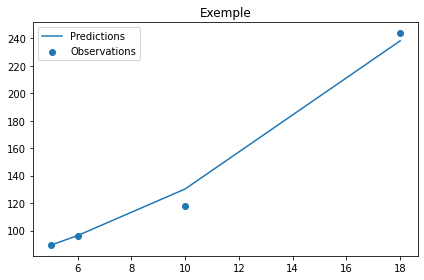

In [348]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2,243.9], label='Observations')
plt.plot(t_list,[np.exp(a[0]*u+a[1]) for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

Supposons que la relation est lineaire entre le spread et le log de la maturité ?

In [349]:
#log(s) = a x t + b 
t = np.array([5,6])
y = np.array([89.3,96.3])
x= np.log(t).reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)
a = np.dot(np.linalg.inv(x),y.reshape(-1,1))
print(a)


[[38.39370463]
 [27.50771616]]


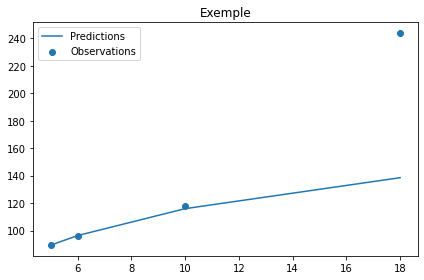

In [350]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2,243.9], label='Observations')
plt.plot(t_list,[a[0]*np.log(u)+a[1] for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

<b>Meme exercice en minimisant les erreurs : </b>

<b>Cas log linear</b>

In [351]:
t = np.array([5,6,10,18])
y = np.array([89.3,96.3,118.2,243.9])
x= t.reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)

a = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),np.log(y).reshape(-1,1)).reshape(-1)
print(a)

[0.07710107 4.0804161 ]


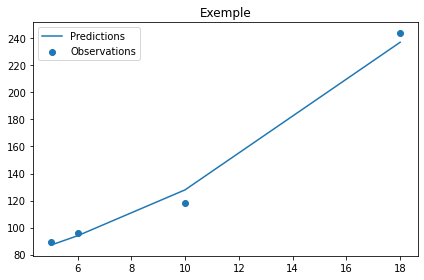

In [352]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2,243.9], label='Observations')
plt.plot(t_list,[np.exp(a[0]*u+a[1]) for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

<b>Indicateur d'erreur?</b>

In [356]:
np.mean(np.abs(y-np.array([np.exp(a[0]*u+a[1]) for u in t_list])))

5.301417561696713

<b>Cas linear log</b>

In [357]:
t = np.array([5,6,10,18])
y = np.array([89.3,96.3,118.2,243.9])
x= np.log(t).reshape(-1,1)
x= np.append(x, np.ones((t.shape[0],1)), axis=1)

a = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y.reshape(-1,1)).reshape(-1)
print(a)

[ 117.58639836 -115.71391079]


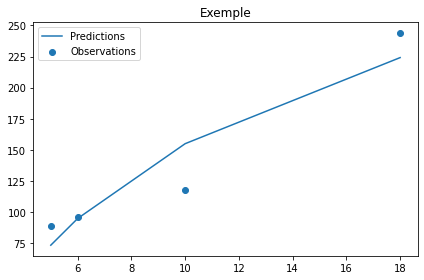

In [358]:
t_list = [5,6,10,18]
plt.scatter(t_list,[89.3,96.3,118.2,243.9], label='Observations')
plt.plot(t_list,[a[0]*np.log(u)+a[1] for u in t_list], label='Predictions')
plt.legend(loc=0)
plt.title("Exemple")
plt.tight_layout()

<b>Indicateur d'erreur ?</b>

In [359]:
np.mean(np.abs(y-np.array([a[0]*np.log(u)+a[1] for u in t_list])))

18.419388606813403